# Tugas Besar 1 Pemrograman Data Analitik 2 


Nama : Sukmawati Rizki Firdaus
Nim  : 41820010127

# Dataset yang digunakan adalah dataset Earthquake.csv dengan keterangan seperti di bawah:
The data contains intensity of earthquake per year, include date and year and also intensity of earthquake as follow.

* **date** - Date Identifier
* **Year** - Year Identifier
* **earthquakes_per_years** - intensity of earthquake



Merujuk kepada tugas Air Passenger
1. Buatlah grafik yang menggambarkan plot earthquake dengan waktu terjadinya gempa.
2. Buatlah grafik Autokorelasi fungsi nya dan jelaskan dengan bahasa Anda sendiri apa meaning dari grafik tersebut.
3. Buatlah grafik Partial Autokorelasinya dan jelaskan dengan bahasa Anda sendiri apa meaning dari grafik tersebut.
4. Lakukan uji stasioneritas dengan menggunakan statistika adfuller
    a. Nilai Uji statistika
    b. Nilai p-value
    c. Nilai Krikital
5. Tentukan dari data himpunan berikut:
    a. Trend
    b. Seasonal
    c. Residual
6. Dengan menggunakan data pada soal no 5 buatlah plot grafik yang menggambarkan:
    a. Trend
    b.Seasonal
    c. Residual
7. Buatlah model ARIMA dari data earthquake. Dari nilai AIC tentukan Best model untuk kasus ini.Munculkan ringakasan uji statistikanya seperti gambar di bawah
![image.png](attachment:image.png)


8. Ujilah model Anda dan berikan hasil ringkasan dari uji statistika seperti gambar di bawah ini.
![image.png](attachment:image.png)

9. Lakukan prediksi dari kasus yang Ada dengan model ARIMA yang Anda buat, lalu buatlah plot hasil prediksinya seperti gambar di bawah ini:
![image.png](attachment:image.png)

10. Dengan model yang telah Anda buat di atas lakukan forecast (ramalan) tentang gempa bumi pada peride yang akan datang dan 
buatlah plotnya seperti gambar di bawah ini.
![image.png](attachment:image.png)


In [ ]:
from google.colab import files
uploaded = files.upload(
)

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read in the data
data = pd.read_csv('earthquakes.csv')

# Plot the data
fig = px.line(data, x='date', y='earthquakes_per_year',
              labels=({'earthquakes_per_year': 'Earthquakes per year', 'date': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18),
                  title_text='Earthquakes per year', width=650,
                  title_x=0.5, height=400)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(data['earthquakes_per_year'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rc("figure", figsize=(11,5))
plot_pacf(data['earthquakes_per_year'], method='ywm')
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
data.columns

In [ ]:
data["date"]=pd.to_datetime(data["date"])
data

In [ ]:
data.dtypes

In [ ]:
data.set_index("date",inplace=True)
data

In [ ]:
plt.plot(data["earthquakes_per_year"])

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_= adfuller(data)

In [ ]:
print(pvalue)

In [ ]:
print(adf)

In [ ]:
print(critical_values_)

In [ ]:
data["Year"]=[d.year for d in data.index]
data

In [ ]:
data["month"]=[d.strftime('%b') for d in data.index]
data

In [ ]:
sns.boxplot(x='Year',y='earthquakes_per_year',data=data)

In [ ]:
sns.boxplot(x='Year',y='earthquakes_per_year',data=data)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(data["earthquakes_per_year"],
                             model='additive'
                             )

In [ ]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

In [ ]:
trend

In [ ]:
sesonal

In [ ]:
residual

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data["earthquakes_per_year"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model=auto_arima(data["earthquakes_per_year"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

In [ ]:
arima_model.summary()

In [ ]:
size=int(len(data)*0.66)
X_train,X_test=data[0:size],data[size:len(data)]

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(X_train["earthquakes_per_year"],
             order=(1,1,1),
             seasonal_order=(0,1,0,12))
result=model.fit()
result.summary()

In [ ]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

In [ ]:
st_index=len(X_train)
ed_index=len(data)-1
predction=result.predict(st_index,ed_index)
predction

In [ ]:
predction.plot(legend=True)
X_test["earthquakes_per_year"].plot(legend=True)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
trainScore=math.sqrt(mean_squared_error(X_train['earthquakes_per_year'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["earthquakes_per_year"],predction))
trainScore,testScore

In [ ]:
forcast=result.predict(start=len(data),
                      end=(len(data)-1)+3*12,
                      typ="levels").rename('Forecast')

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X_train["earthquakes_per_years"],label="Training",color='green')
plt.plot(X_test["earthquakes_per_years"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model=auto_arima(data["earthquakes_per_year"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

In [26]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   99
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -294.081
Date:                            Mon, 17 Apr 2023   AIC                            594.161
Time:                                    01:07:03   BIC                            601.524
Sample:                                         0   HQIC                           597.125
                                             - 99                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5469      0.094     -5.812      0.000      -0.731      -0.363
ma.S.L12      -0.7445      0.155     -4.790      0.000      -1.049      -0.440
sigma2        48.6898      7.847      6.205      0.000      33.310      64.070
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.85   Prob(JB):                         0.68
Heteroskedasticity (H):               0.76   Skew:                             0.17
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
size=int(len(data)*0.66)
X_train,X_test=data[0:size],data[size:len(data)]

In [28]:
X_train.shape

(65, 3)

In [29]:
X_test.shape

(34, 3)

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model=SARIMAX(X_train["earthquakes_per_year"],
             order=(0,1,1),
             seasonal_order=(2,1,0,12))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                earthquakes_per_year   No. Observations:                   65
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -181.784
Date:                             Mon, 17 Apr 2023   AIC                            371.569
Time:                                     01:07:56   BIC                            379.374
Sample:                                          0   HQIC                           374.561
                                              - 65                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5550      0.115     -4.838      0.000      -0.780      -0.330
ar.S.L12      -0.4071      0.212     -1.924      0.054      -0.822       0.008
ar.S.L24      -0.5166      0.205     -2.525      0.012      -0.918      -0.116
sigma2        53.8552     12.994      4.145      0.000      28.388      79.322
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.67   Prob(JB):                         0.68
Heteroskedasticity (H):               1.87   Skew:                             0.25
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

0      0.000000
1     12.999714
2     13.999956
3      8.000264
4      9.999912
        ...    
60    16.275754
61    22.939744
62    23.115822
63     9.896692
64    12.834986
Name: predicted_mean, Length: 65, dtype: float64

In [33]:
st_index=len(X_train)
ed_index=len(data)-1
predction=result.predict(st_index,ed_index)
predction

65    15.103583
66     8.711692
67    15.080735
68     7.088287
69    19.306984
70     8.335234
71    13.317429
72    15.699013
73    12.968754
74    12.928101
75    15.279202
76    13.785637
77    13.816510
78    12.123707
79    22.912574
80    13.446280
81    16.545209
82    16.798843
83    14.556582
84    16.235723
85    19.187115
86    21.040917
87    12.589813
88    10.185214
89    12.774935
90     9.887961
91    16.620542
92     9.816600
93    20.131370
94     9.085035
95     9.793284
96    14.144057
97    14.126377
98    13.680233
Name: predicted_mean, dtype: float64

<Axes: >

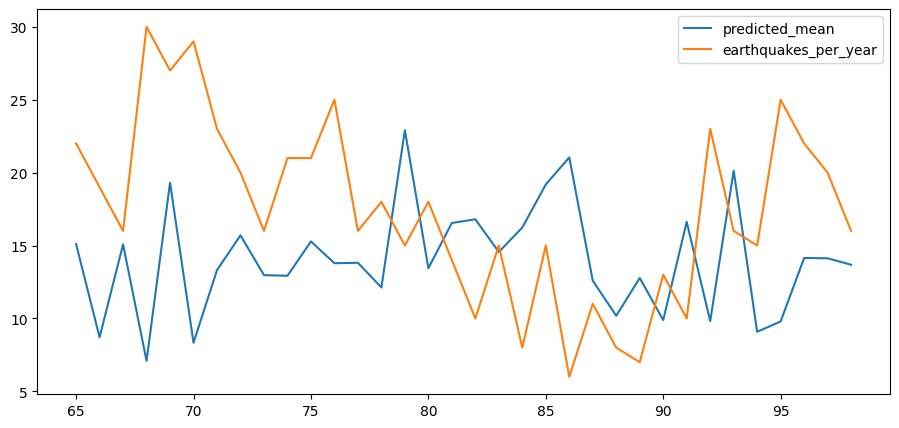

In [34]:
predction.plot(legend=True)
X_test["earthquakes_per_year"].plot(legend=True)

In [35]:
import math
from sklearn.metrics import mean_squared_error

In [36]:
trainScore=math.sqrt(mean_squared_error(X_train['earthquakes_per_year'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["earthquakes_per_year"],predction))
trainScore,testScore

(8.008576106063027, 8.829260153122172)

In [37]:
forcast=result.predict(start=len(data),
                      end=(len(data)-1)+3*12,
                      typ="levels").rename('Forecast')

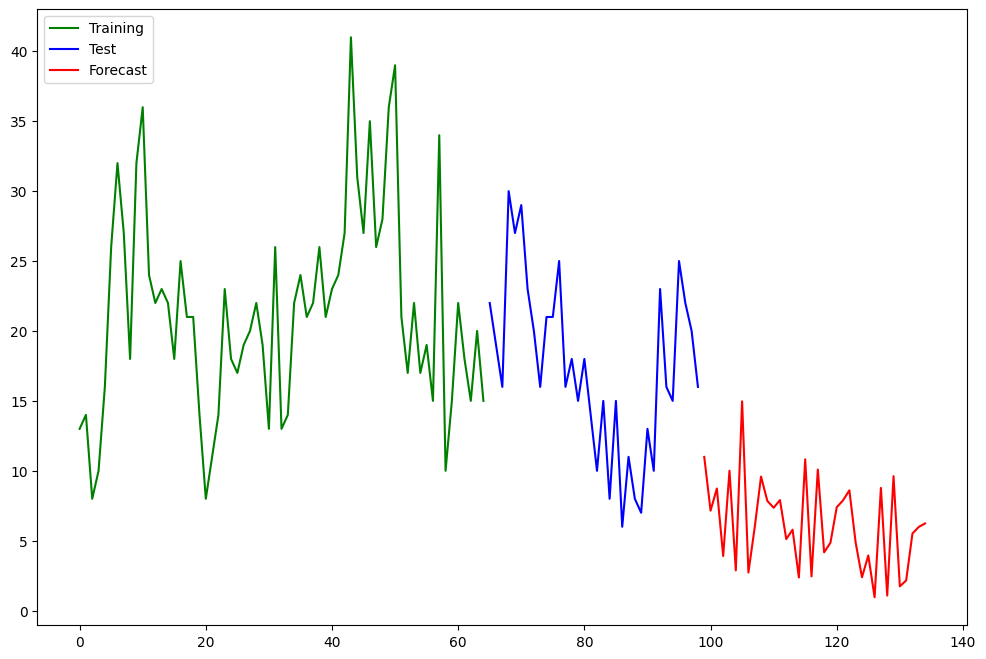

In [38]:
plt.figure(figsize=(12,8))
plt.plot(X_train["earthquakes_per_year"],label="Training",color='green')
plt.plot(X_test["earthquakes_per_year"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")
     